# **Predicting Health Insurance Price for an individual or family**

1- Why is this proposal important in today’s world? How predicting a health insurance cost
accurately can affect the health care/insurance field?

Answer:This proposal is important in today’s world because healthcare costs are rising, and accurately predicting health insurance costs can help improve affordability, transparency, and decision-making for individuals, insurance companies, and policymakers

2- If any, what is the gap in the knowledge, or how your proposed method can be helpful if required
in the future for any other type of insurance?


Answer:The main gap in knowledge lies in the limited use of advanced, accurate, and interpretable machine learning models for predicting insurance costs. Many traditional methods rely on generalized formulas or outdated data, which fail to capture the complex relationships between health behaviors, medical history, demographics, and cost.

# **Objective:**
To perform all data analysis steps and finally create a machine learning model which
can predict the health insurance cost

**Business Benefits:**


*   Accurate predictions allow insurers to set competitive and fair premiums, attracting more customers while maintaining profitability.
*   Personalized and transparent pricing improves customer satisfaction and loyalty, leading to higher retention rates


**Target Variable (Dependent Variable):**

*   health_insurance_price


**Features (Independent Variables):**

*   Age	,gender,	BMI	Children,	smoking_status,	location









# **Data Understanding**

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
df= pd.read_excel('/content/4021579-Health_insurance_cost.xlsx')
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Display first 5 rows
print("First 5 rows of the dataset: ")
print(df.head())

First 5 rows of the dataset: 
    age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520  


In [ ]:
#DataSet shape
print("Shape of the dataset: ")
print(df.shape)

Shape of the dataset: 
(1338, 7)


In [ ]:
#Displaying columns names
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [ ]:
# Dataset info (Column types, Non-null counts, Dtype)
print("Dataset info: ")
print(df.info()) #Table consists of 3 Object(Categorical)Columns and 4 Numerical(3 float ,1 interger) Columns

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


In [ ]:
#Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [ ]:
#Summary Statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               age          BMI     Children  health_insurance_price
count  1310.000000  1315.000000  1338.000000             1336.000000
mean     39.166412    30.638217     1.094918            13268.527719
std      14.055378     6.110302     1.205493            12112.797724
min      18.000000    15.960000     0.000000             1121.873900
25%      26.000000    26.210000     0.000000             4744.325050
50%      39.000000    30.305000     1.000000             9382.033000
75%      51.000000    34.580000     2.000000            16604.302645
max      64.000000    53.130000     5.000000            63770.428010


In [ ]:
# Summary statistics for categorical columns
print("Summary Statistics for Categorical Columns:")
print(df.describe(include=['object']))

Summary Statistics for Categorical Columns:
       gender smoking_status   location
count    1338           1338       1338
unique      2              2          4
top      male             no  southeast
freq      676           1064        364


In [ ]:
# Unique values in each column
print("Unique Values in each column: ")
for col in df.columns:
  print(f"{col}:                 {df[col].nunique()} unique values")

Unique Values in each column: 
age:                 47 unique values
gender:                 2 unique values
BMI:                 545 unique values
Children:                 6 unique values
smoking_status:                 2 unique values
location:                 4 unique values
health_insurance_price:                 1335 unique values


In [ ]:
#check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
1


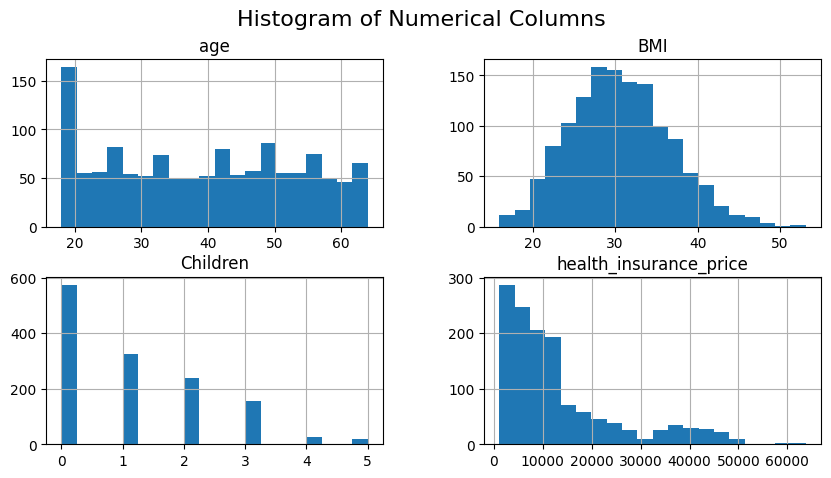

In [ ]:
#Histogram for numerical columns
df.hist(figsize=(10,5),bins=20)
plt.suptitle('Histogram of Numerical Columns',fontsize = 16)
plt.show()

In [ ]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

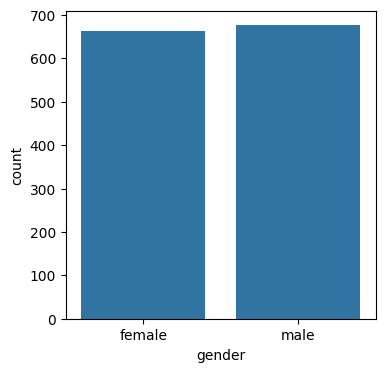

In [ ]:
#countplot or barplot for  variables
plt.figure(figsize= (4,4))
sns.countplot(x = 'gender',data = df)
plt.show()

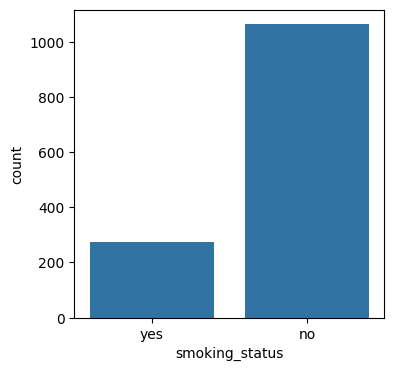

In [ ]:
plt.figure(figsize= (4,4))
sns.countplot(x = 'smoking_status',data = df)
plt.show()


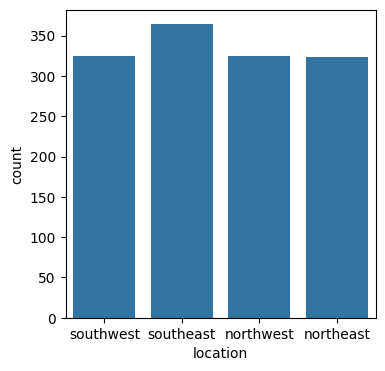

In [ ]:
plt.figure(figsize= (4,4))
sns.countplot(x = 'location',data = df)
plt.show()

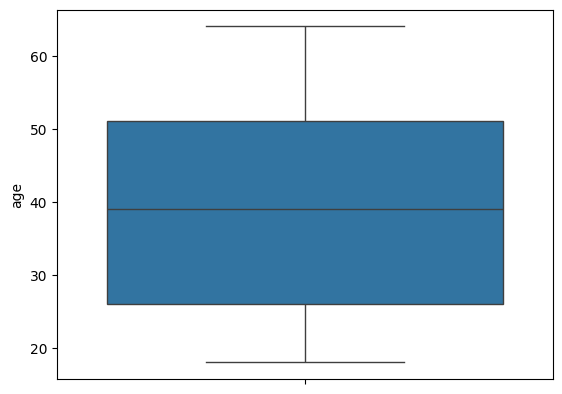

In [ ]:
sns.boxplot(df['age'])
plt.show()

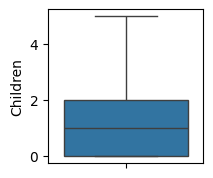

In [ ]:
plt.figure(figsize= (2,2))
sns.boxplot(df['Children'])
plt.show()

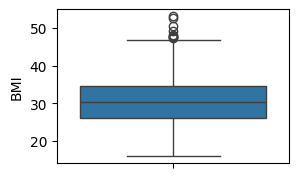

In [ ]:
plt.figure(figsize= (3,2))
sns.boxplot(df['BMI'])
plt.show()

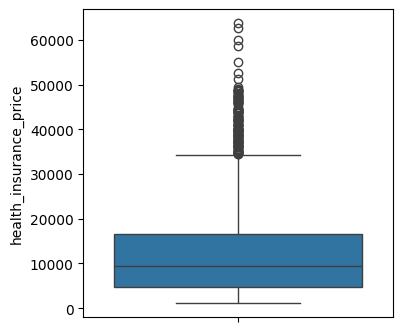

In [ ]:
plt.figure(figsize= (4,4))
sns.boxplot(df['health_insurance_price'])
plt.show()

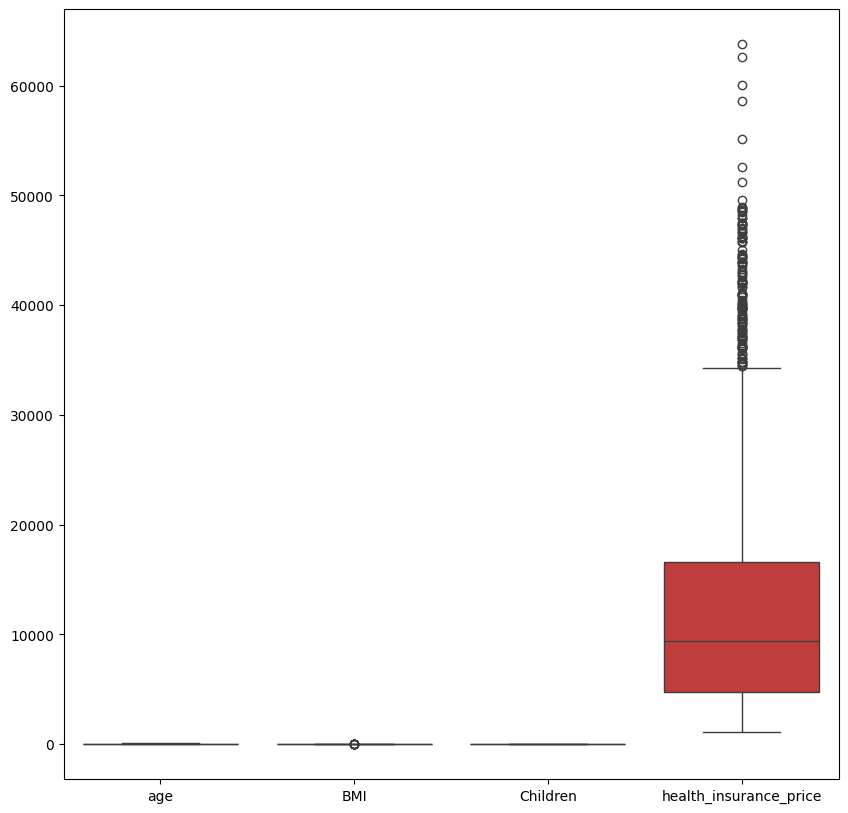

In [ ]:
x = [['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price']]
for i in x:
  plt.figure(figsize= (10,10))
  sns.boxplot(df[i])
  plt.show()

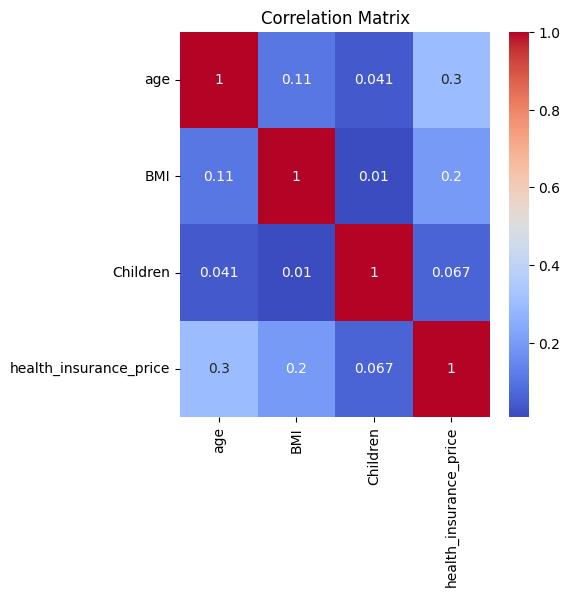

In [ ]:
# Correlation matrix (only for numerical features)
plt.figure(figsize=(5,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **Data Preprocessing**

**Handling Duplicates**

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"number of duplicate rows: {duplicate_rows}")
print(f"count of table :{df.shape}")
df = df.drop_duplicates()
print(f"count of table after dropping duplicates: {df.shape}")


number of duplicate rows: 1
count of table :(1338, 7)
count of table after dropping duplicates: (1337, 7)


**Handling Missing Values**

In [ ]:
# Check missing values before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [ ]:
# Creating separate copy for Median imputation technique
df_mean = df.copy()
df_mode = df.copy()
df_median = df.copy()
df_ffill = df.copy()
df_bfill = df.copy()

In [ ]:
#Median imputation
df_median['age'] = df_median['age'].fillna(df_median['age'].median())
df_median['BMI'] = df_median['BMI'].fillna(df_median['BMI'].median())
df_median['health_insurance_price'] = df_median['health_insurance_price'].fillna(df_median['health_insurance_price'].median())
df= df_median

In [ ]:
print("\nMissing values after Median Imputation:")
print(df.isnull().sum())


Missing values after Median Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


# Optional Methods for impuation

In [ ]:
df_mean['age'] = df_mean['age'].fillna(df_mean['age'].mean())
df_mean['BMI'] = df_mean['BMI'].fillna(df_mean['BMI'].mean())
df_mean['health_insurance_price'] = df_mean['health_insurance_price'].fillna(df_mean['health_insurance_price'].mean())
print("\nMissing values after Mean Imputation:")
print(df.isnull().sum())



Missing values after Mean Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


In [ ]:

#forward fill(ffill)
df_ffill = df_ffill.fillna(method = 'ffill')

In [ ]:
print("Missing values after forward fill :")
print(df_ffill.isnull().sum()) #BMI has missing values,so ffill is not suitable

Missing values after forward fill :
age                       0
gender                    0
BMI                       1
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


In [ ]:
#Optional
#backward fill
df_bfill = df_bfill.fillna(method = 'bfill')

In [ ]:
print("Missing values after backward fill :")
print(df_bfill.isnull().sum())

Missing values after backward fill :
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


# **#Handling Outliers**

In [ ]:
# using interquartile range
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)


Outliers detected using IQR:
 age                         0
BMI                        11
Children                    0
health_insurance_price    141
dtype: int64


In [ ]:
#removing outliers using iqr
#Removes values beyond 1.5 * IQR -- Good for non-normal data
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Consider only numerical columns

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Filter out outliers
df_cleaned = df[~outliers_mask.any(axis=1)]

print("Original Data Shape:", df.shape)
print("After IQR Outlier Removal:", df_cleaned.shape)
df = df_cleaned

Original Data Shape: (1337, 7)
After IQR Outlier Removal: (1188, 7)


# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Create separate copies of the dataset for each scaling method
df_minmax = df.copy()


In [ ]:
# Selecting only numerical columns for scaling
num_cols = df.select_dtypes(include=['number']).columns

In [ ]:
# Min-Max Scaling (0 to 1 Range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])
df= df_minmax
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,0.021739,female,0.469251,0.0,yes,southwest,0.475058
1,0.000000,male,0.582597,0.2,no,southeast,0.018193
2,0.217391,male,0.557409,0.6,no,southeast,0.100285
3,0.326087,male,0.220641,0.0,no,northwest,0.628746
4,0.304348,male,0.422637,0.0,no,northwest,0.082727
...,...,...,...,...,...,...,...
1333,0.695652,male,0.491004,0.6,no,northwest,0.285663
1334,0.000000,female,0.522080,0.0,no,northeast,0.032672
1335,0.000000,female,0.683350,0.0,no,southeast,0.015309
1336,0.065217,female,0.321884,0.0,no,southwest,0.026704


# **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
# Label Encoding
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])
# Display results
print("Label Encoded Data:")
print(df_label_encoded.head())
print("\nUnique Values in Each Column:")
print(df_label_encoded.shape)

Label Encoded Data:
        age  gender       BMI  Children  smoking_status  location  \
0  0.021739       0  0.469251       0.0               1         3   
1  0.000000       1  0.582597       0.2               0         2   
2  0.217391       1  0.557409       0.6               0         2   
3  0.326087       1  0.220641       0.0               0         1   
4  0.304348       1  0.422637       0.0               0         1   

   health_insurance_price  
0                0.475058  
1                0.018193  
2                0.100285  
3                0.628746  
4                0.082727  

Unique Values in Each Column:
(1188, 7)


# **Data Splitting (Train-Test Split)**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#input Variables
x = df_label_encoded[['age','gender', 'BMI', 'Children', 'smoking_status', 'location']]  # Exclude the target variable 'health_insurance_price'
print(x)

           age  gender       BMI  Children  smoking_status  location
0     0.021739       0  0.469251       0.0               1         3
1     0.000000       1  0.582597       0.2               0         2
2     0.217391       1  0.557409       0.6               0         2
3     0.326087       1  0.220641       0.0               0         1
4     0.304348       1  0.422637       0.0               0         1
...        ...     ...       ...       ...             ...       ...
1333  0.695652       1  0.491004       0.6               0         1
1334  0.000000       0  0.522080       0.0               0         0
1335  0.000000       0  0.683350       0.0               0         2
1336  0.065217       0  0.321884       0.0               0         3
1337  0.934783       0  0.428852       0.0               1         1

[1188 rows x 6 columns]


In [ ]:
#Actual Output Variable
y = df_label_encoded['health_insurance_price']
print(y)

0       0.475058
1       0.018193
2       0.100285
3       0.628746
4       0.082727
          ...   
1333    0.285663
1334    0.032672
1335    0.015309
1336    0.026704
1337    0.844436
Name: health_insurance_price, Length: 1188, dtype: float64


# **Model Selection & Training**

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
#model evaluation
mae = mean_absolute_error(y_test,y_pred)
print("mae is:",mae)
mse = mean_squared_error(y_test,y_pred)
print("mse is:",mse)
rmse = np.sqrt(mse)
print("rmse is:",rmse)

mae is: 0.08570829587655232
mse is: 0.024277143588816368
rmse is: 0.15581124346085032


# Decision Tree Regressor

In [ ]:
#Decision Tree Regressor
from sklearn.metrics import mean_squared_error, r2_score # Also import r2_score here
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor from sklearn.tree


dt_model =DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)
test_pred_dt = dt_model.predict(x_test)
mse = mean_squared_error(y_test,test_pred_dt)
print("mse is:",mse)
rmse =np.sqrt(mse)
print("rmse is:",rmse)
r2 =r2_score(y_test,test_pred_dt)
print("R Square: ",r2)

mse is: 0.042613336936839726
rmse is: 0.20642998071220112
R Square:  0.13181497065354586


# Random Forest Regressor

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)
test_pred_rf = rf_model.predict(x_test)
mse = mean_squared_error(y_test,test_pred_rf)
print("mse:", mse) # Print the MSE
rmse = np.sqrt(mse) # Use np.sqrt for square root
print("rmse:", rmse) # Print the RMSE
r2 = r2_score(y_test,test_pred_rf)
print("r2:", r2) # Print the R2 score

mse: 0.025483931634671466
rmse: 0.1596368742949807
r2: 0.48080179764135855


# KNeighborsRegressor

In [ ]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

knn =KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
test_pred_knn = knn.predict(x_test)
mse = mean_squared_error(test_pred_knn,y_test)
print('mse:',mse)
rmse = sqrt(mse)
print('rmse:',rmse)
r2 = r2_score(test_pred_knn,y_test)
print('r2:',r2)

mse: 0.026370747098757474
rmse: 0.16239072356128437
r2: 0.1675965361958165


# **Justification**
The Random Forest Regressor's role in this dataset is to provide a more accurate and robust prediction of health insurance costs for individuals or families. By leveraging the power of multiple decision trees and handling complex relationships, it aims to deliver predictions that are closer to the actual insurance prices.

In [ ]:
#Real time prediction by using linear regression
#Create a DataFrame with the input data, using the same column names as the training data
input_data = pd.DataFrame([[45, 3, 35, 0, 1,  0]],  # Assuming 1 represents 'southeast' after label encoding - Replace as needed. 0 for another location.
                          columns=['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location'])

# Make the prediction
predicted_cost = model.predict(input_data)
predicted_cost=predicted_cost #linear regreesion
print(f"Predicted cost: {predicted_cost[0]:,.5f}") # Scaled output

Predicted cost: 17.60734
